<a href="https://colab.research.google.com/github/grewtree/Project_pregnant_seat_subway/blob/master/n123a_confidence_intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.
  - 인덱스를 초기화 합니다.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)


df = pd.read_csv('/content/drive/MyDrive/서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding = 'euc-kr')

df.head()


,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   측정일시            18600 non-null  int64  
 1   권역코드            18600 non-null  int64  
 2   권역명             18600 non-null  object 
 3   측정소코드           18600 non-null  int64  
 4   측정소명            18600 non-null  object 
 5   미세먼지 1시간(㎍/㎥)   18600 non-null  int64  
 6   미세먼지 24시간(㎍/㎥)  18600 non-null  int64  
 7   초미세먼지(㎍/㎥)      18600 non-null  int64  
 8   오존(ppm)         18600 non-null  float64
 9   이산화질소농도(ppm)    18600 non-null  float64
 10  일산화탄소농도(ppm)    18600 non-null  float64
 11  아황산가스농도(ppm)    18600 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.7+ MB


In [15]:
cond1 = df['측정소명'] == '송파구'

df = df.loc[cond1].reset_index(drop = True)

df

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,104,동남권,111273,송파구,49,47,23,0.020,0.044,0.5,0.004
1,202003312200,104,동남권,111273,송파구,41,48,19,0.021,0.045,0.6,0.004
2,202003312100,104,동남권,111273,송파구,42,50,17,0.025,0.042,0.6,0.004
3,202003312000,104,동남권,111273,송파구,43,54,18,0.032,0.040,0.5,0.004
4,202003311900,104,동남권,111273,송파구,52,55,22,0.034,0.045,0.5,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...
739,202003010400,104,동남권,111273,송파구,30,30,21,0.002,0.039,1.2,0.002
740,202003010300,104,동남권,111273,송파구,31,30,20,0.002,0.040,1.2,0.002
741,202003010200,104,동남권,111273,송파구,29,30,21,0.002,0.042,1.1,0.002
742,202003010100,104,동남권,111273,송파구,30,30,20,0.002,0.042,1.1,0.002


In [16]:
df = df[['측정일시', '측정소명', '오존(ppm)']]
df

,측정일시,측정소명,오존(ppm)
0,202003312300,송파구,0.020
1,202003312200,송파구,0.021
2,202003312100,송파구,0.025
3,202003312000,송파구,0.032
4,202003311900,송파구,0.034
...,...,...,...
739,202003010400,송파구,0.002
740,202003010300,송파구,0.002
741,202003010200,송파구,0.002
742,202003010100,송파구,0.002


In [17]:
df.loc[ df['측정일시'] == 202003010200 ]

,측정일시,측정소명,오존(ppm)
741,202003010200,송파구,0.002


In [36]:
df['오존(ppm)'] = pd.to_numeric(df['오존(ppm)'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   측정일시     744 non-null    int64  
 1   측정소명     744 non-null    object 
 2   오존(ppm)  744 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.6+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [18]:
# 이 곳에 답안을 작성하시길 바랍니다

s1 = df.sample(20, random_state = 42)
s2 = df.sample(200, random_state = 42)


In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
s1.shape
s2.shape

(20, 3)

(200, 3)

## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [22]:
# 이 곳에 답안을 작성하시길 바랍니다

s1_mean = s1['오존(ppm)'].mean()
s2_mean = s2['오존(ppm)'].mean()

s1_mean
s2_mean

0.021750000000000002

0.02291999999999995

In [30]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 609 to 603
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   측정일시     20 non-null     int64  
 1   측정소명     20 non-null     object 
 2   오존(ppm)  20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 640.0+ bytes


## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [54]:
from scipy import stats

def confidence_interval(data, confidence = 0.95):
  
  """
  주어진 데이터의 표본 **평균**에 대한 신뢰구간을 계산.
  기본 값으로 t-분포와 양방향 (two-tailed), 95%의 신뢰도를 사용합니다. 
  
  입력 값 : 
    data - 여러 개로 이루어진 (list 혹은 numpy 배열) 표본 관측치
    confidence - 신뢰구간을 위한 신뢰도 
  
  반환 되는 값:
    (평균, 하한, 상한구간)으로 이루어진 tuple
  """

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  
  # std / sqrt(n)
  stderr = stats.sem(data) 
  # Standard Error of Mean (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
  # s / sqrt(n)

  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval)


In [42]:
CI1 = confidence_interval(np.array(s1['오존(ppm)']))
CI2 = confidence_interval(np.array(s2['오존(ppm)']))

CI1 , CI2

((0.02175, 0.015060460813957323, 0.028439539186042674),
 (0.02292, 0.02100651526262625, 0.02483348473737375))

## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

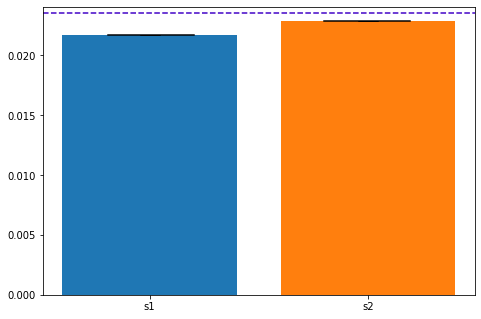

In [59]:
# 이 곳에 답안을 작성하시길 바랍니다

import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

pop_mean = np.mean(df['오존(ppm)'])

plt.bar(x='s1', height=s1_mean, yerr=CI1[0]-s1_mean, capsize=10)
plt.bar(x='s2', height=s2_mean, yerr=CI2[0]-s2_mean, capsize=10)

plt.axhline(pop_mean, linestyle='--', color='#4000c7')
plt.axhline(s1_mean, color='black', xmin=0.15, xmax=0.35)
plt.axhline(s2_mean, color='black', xmin=0.65, xmax=0.85)

plt.show()

# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다

## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한정리를 구현하는 코드를 작성하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다